In [2]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 1.5 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.9/245.9 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 1.8 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Importing Data from the CSV File

In [4]:
house_df = pd.read_csv('train.csv')

Checking for the data, number of rows vs columns

In [5]:
house_df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

Creating derived column for 'Porch' and 'Pool' based columns, to track finally whether a house has a Porch/Pool or not

In [7]:
house_df['Pool'] = house_df['PoolArea'].apply(lambda x: 1 if x> 0 else 0)
cols = ['WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
house_df['Porch'] = house_df[cols].apply(lambda x: 1 if (x > 0).any() else 0, axis=1)
# house_df['Porch'] = house_df.apply(lambda x: 1 if x['WoodDeckSF'] or x['OpenPorchSF'] or x['EnclosedPorch'] or x['3SsnPorch'] or x['ScreenPorch'] else 0)

checking for null values

In [11]:
house_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
SaleType           0
SaleCondition      0
SalePrice          0
Pool               0
Porch              0
Length: 83, dtype: int64

Handling Non Nulls in Data, by replacing it with 0 and 0.00 after carefully examining data

In [15]:
house_df['LotFrontage'].fillna(0, inplace = True)
house_df['MasVnrArea'].fillna(0.00, inplace = True)

In [19]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are few non-numeric columns which make a huge impact on the house price, and we are label-encoding them to machine readable format (numeric)

In [16]:
from sklearn import preprocessing

In [17]:
label_encoder = preprocessing.LabelEncoder()

In [20]:
cols = house_df.select_dtypes(include=['object']).columns.tolist()

In [21]:
for col in cols:
    house_df[col] = label_encoder.fit_transform(house_df[col])

In [22]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
house_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
SaleType         0
SaleCondition    0
SalePrice        0
Pool             0
Porch            0
Length: 83, dtype: int64

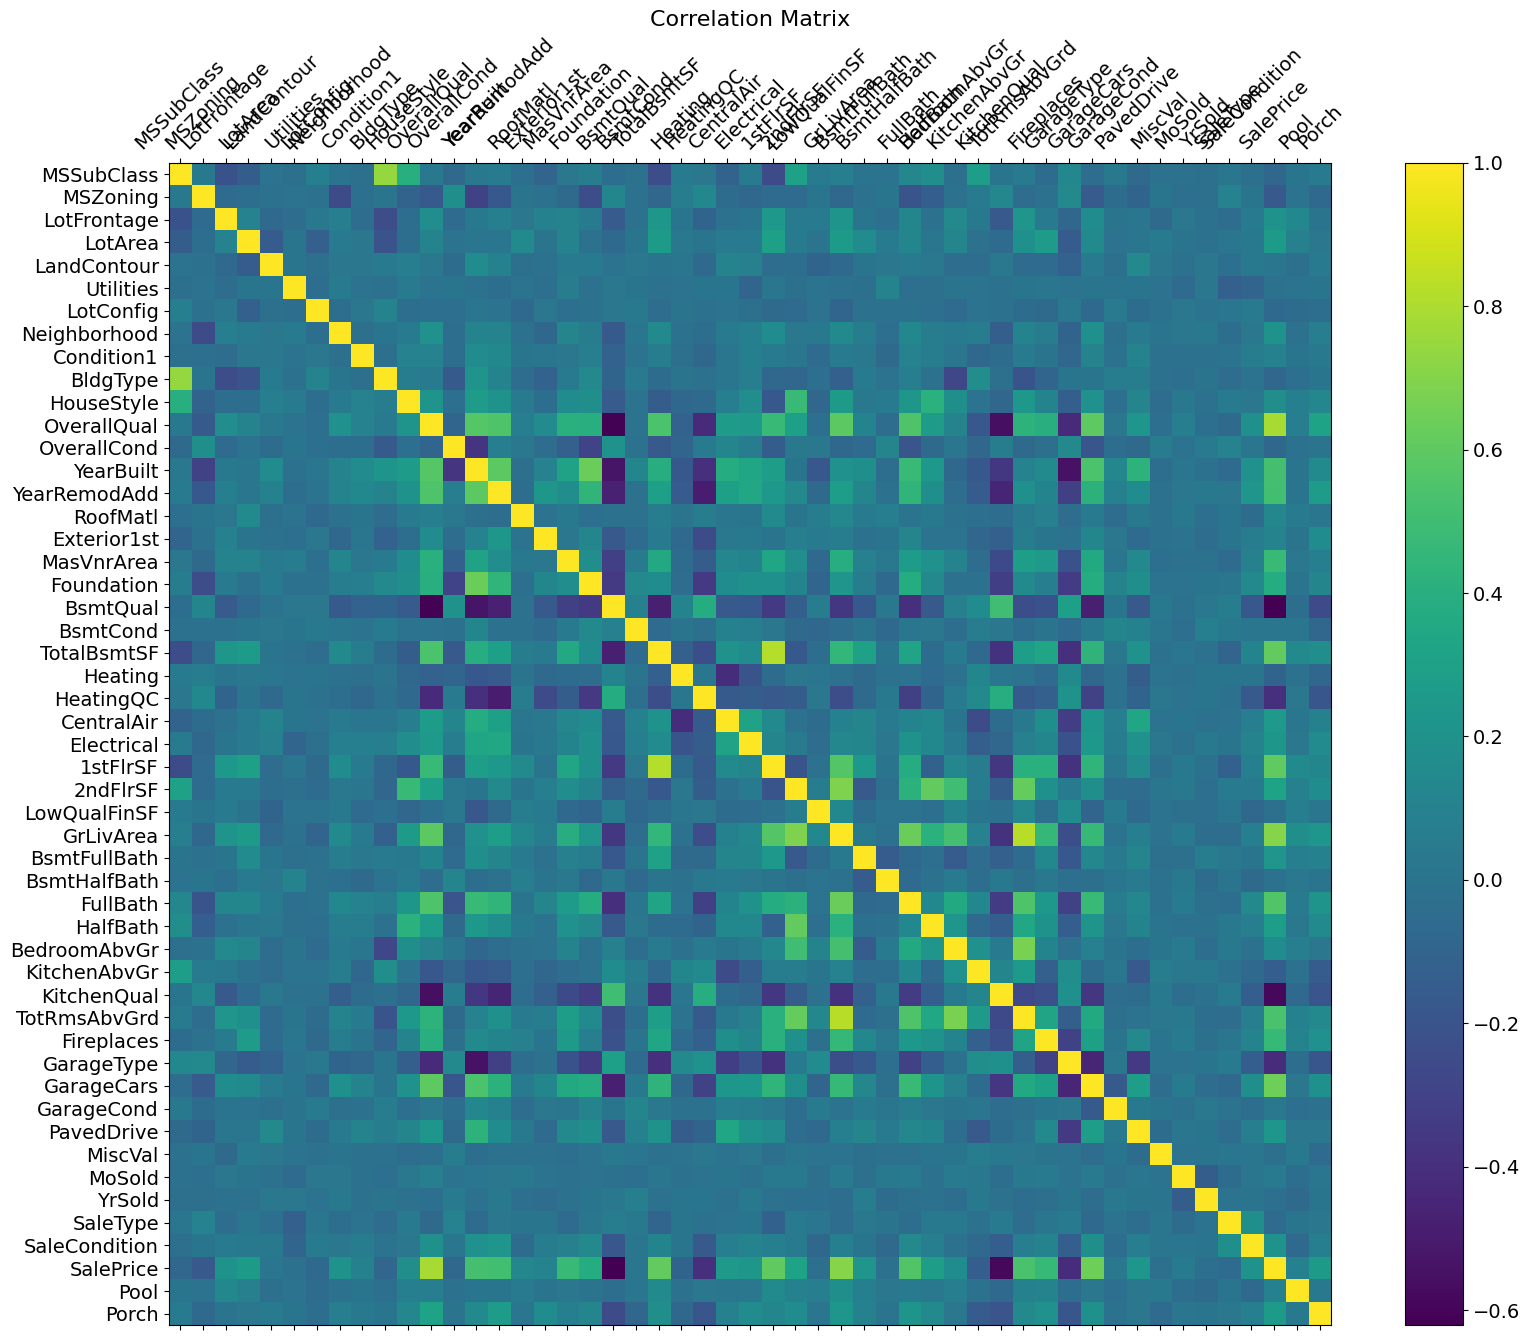

In [30]:
f = plt.figure(figsize=(19, 15))
plt.matshow(house_df.corr(), fignum=f.number)
plt.xticks(range(house_df.select_dtypes(['number']).shape[1]), house_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(house_df.select_dtypes(['number']).shape[1]), house_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Eliminating list of columns which are not essential in assessing the price of a house and also carry duplicate information (highly co-related with some other column)

In [27]:
house_df.drop(['Id', 'Street' ,'Alley', 'LotShape', 'Condition2', 'LandSlope', 'RoofStyle','Exterior2nd', 'ExterQual', 'ExterCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Functional', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual', 'PoolArea', 'PoolQC', 'MiscFeature', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MasVnrType', 'BsmtExposure', 'Fence', 'Condition2'], axis = 1, inplace=True)

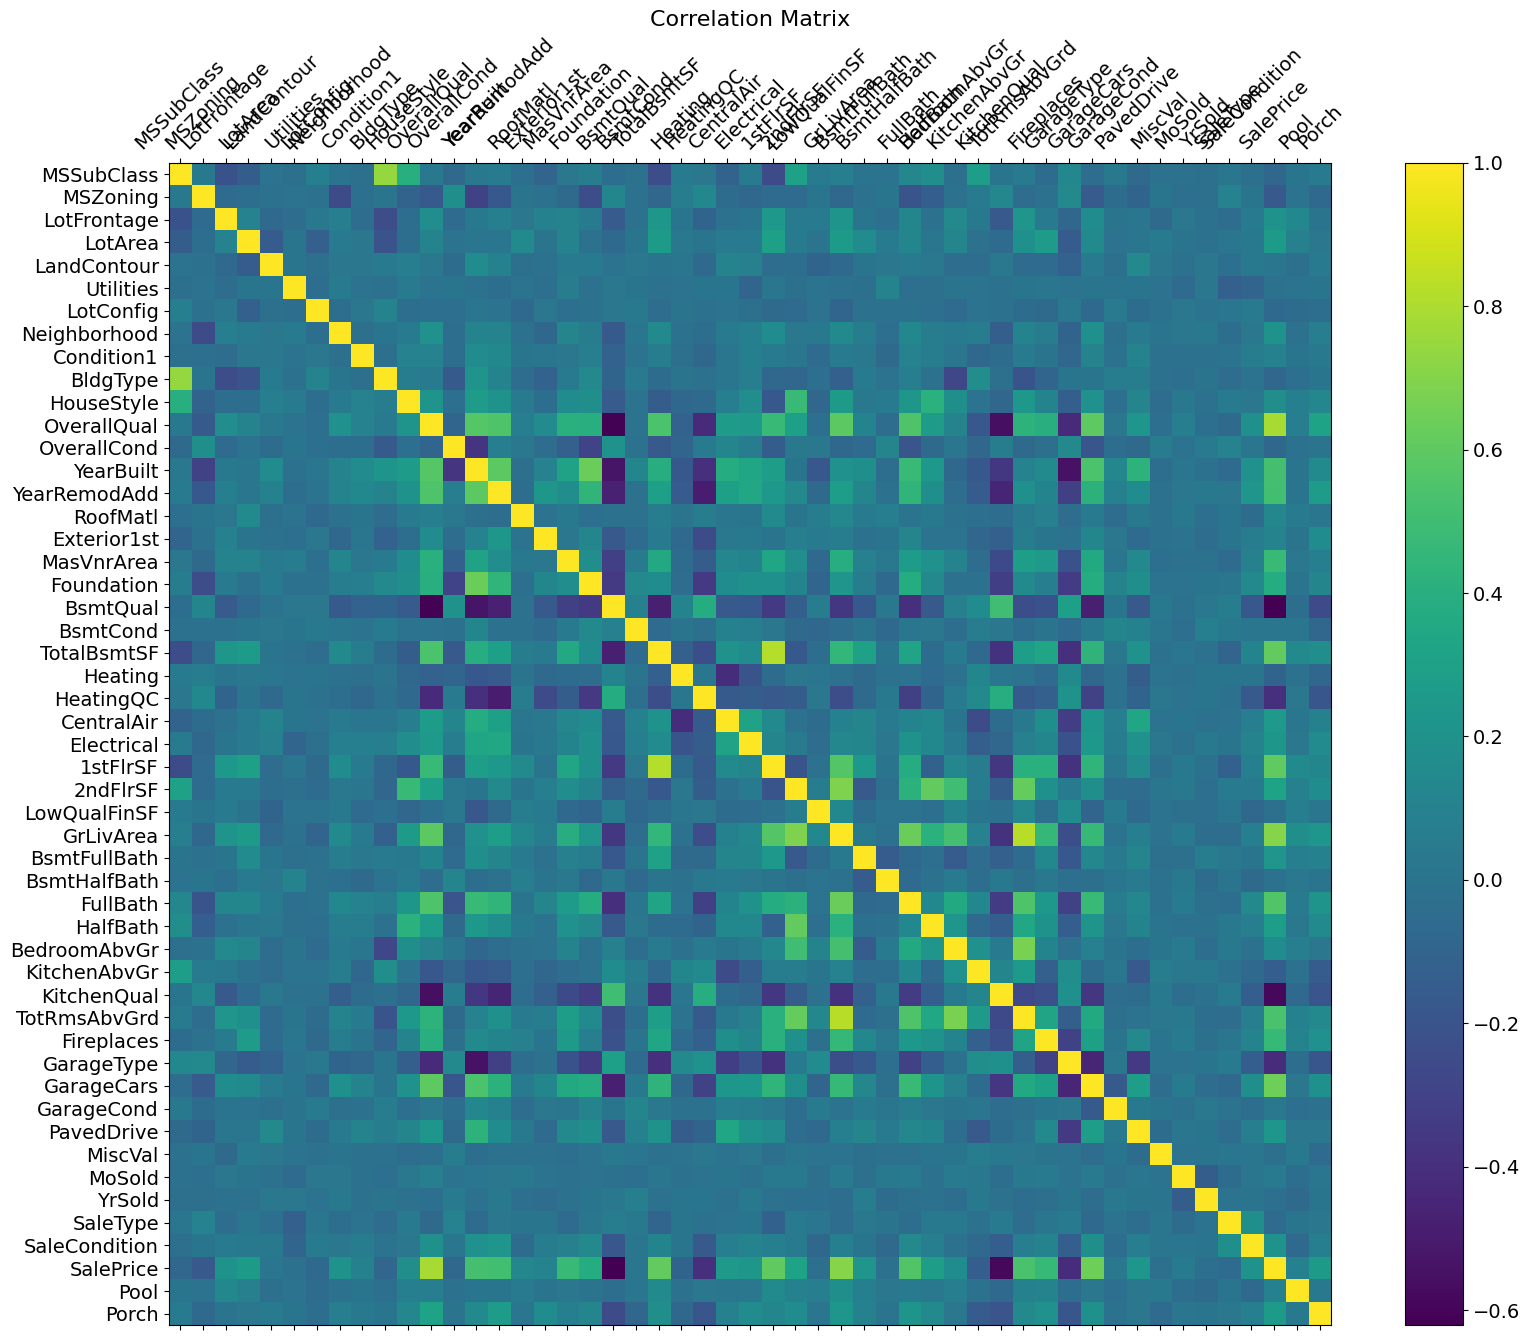

In [29]:
f = plt.figure(figsize=(19, 15))
plt.matshow(house_df.corr(), fignum=f.number)
plt.xticks(range(house_df.select_dtypes(['number']).shape[1]), house_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(house_df.select_dtypes(['number']).shape[1]), house_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [31]:
house_df.info

<bound method DataFrame.info of       MSSubClass  MSZoning  LotFrontage  LotArea  LandContour  Utilities  \
0             60         3         65.0     8450            3          0   
1             20         3         80.0     9600            3          0   
2             60         3         68.0    11250            3          0   
3             70         3         60.0     9550            3          0   
4             60         3         84.0    14260            3          0   
...          ...       ...          ...      ...          ...        ...   
1455          60         3         62.0     7917            3          0   
1456          20         3         85.0    13175            3          0   
1457          70         3         66.0     9042            3          0   
1458          20         3         68.0     9717            3          0   
1459          20         3         75.0     9937            3          0   

      LotConfig  Neighborhood  Condition1  BldgType  ..

In [312]:
# pip install scikit-learn

Starting Ridge and Lasso Regularization

In [33]:
from sklearn.model_selection import train_test_split

Prepare the dataset for regression

In [34]:
y = house_df['SalePrice']
x = house_df.drop('SalePrice', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 80, random_state=0)

In [35]:
from sklearn.linear_model import LassoCV, RidgeCV
import numpy as np

In [323]:
# Ridge Regularization

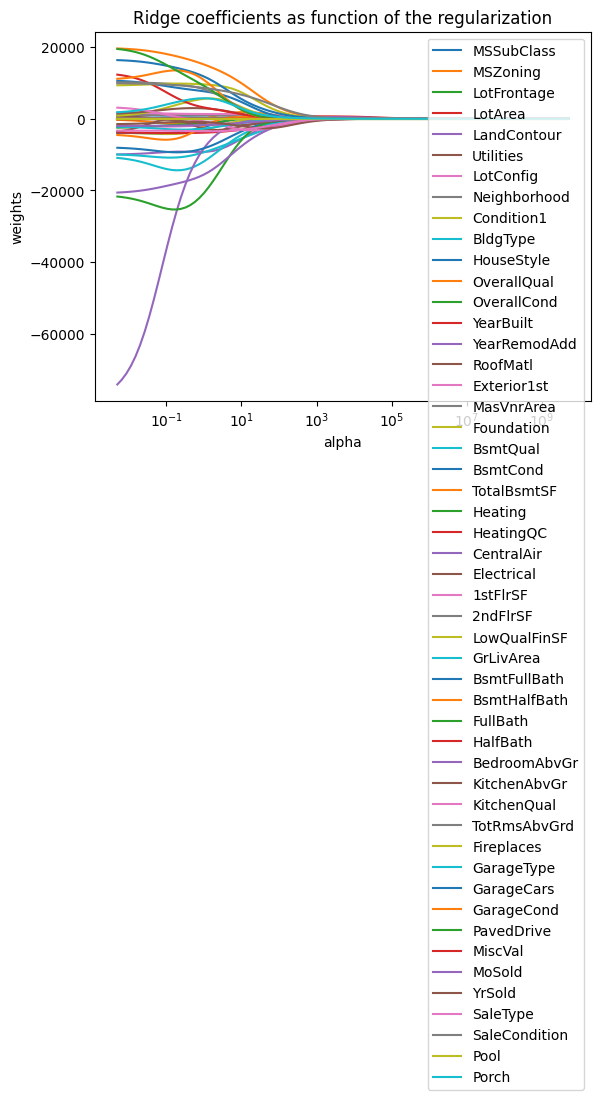

In [43]:
alphas = 10**np.linspace(10,-2,100)*0.5
w = list()
for a in alphas:
    ridge_clf = RidgeCV(alphas=[a],cv=10).fit(x_train, y_train)
    w.append(ridge_clf.coef_)
w = np.array(w)
plt.semilogx(alphas,w)
plt.title('Ridge coefficients as function of the regularization')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(x_train.keys())

In [51]:
ridge_clf = RidgeCV(alphas=alphas,cv=10).fit(x_train, y_train)

In [52]:
y_pred = ridge_clf.predict(x_test)

In [53]:
ridge_clf.alpha_

66.09705742330144

In [54]:
from sklearn.metrics import r2_score

In [55]:
r2_score(y_test, y_pred)

0.7252743109208033

In [299]:
# Lasso Regularization

/Users/spyaraka/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55627142.70161629, tolerance: 28861323.978800002
  model = cd_fast.enet_coordinate_descent_gram(
/Users/spyaraka/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 985428612.5074596, tolerance: 27391593.111644447
  model = cd_fast.enet_coordinate_descent_gram(
/Users/spyaraka/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49242267.40224075, tolerance: 32361466.447800003
  model = cd_fast.enet_coordinate_descent_gram(
/Users/spyaraka/miniconda3/lib/python3.11/site-packa

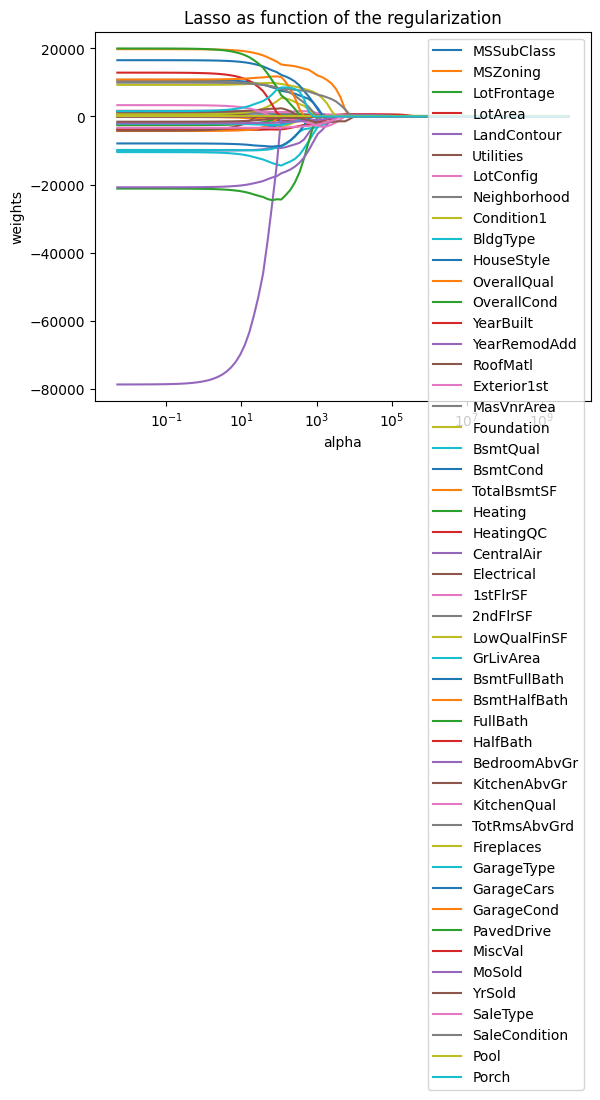

In [57]:
alphas = 10**np.linspace(10,-2,100)*0.5
w = list()
for a in alphas:
    lasso_clf = LassoCV(alphas=[a],cv=10).fit(x_train, y_train)
    w.append(lasso_clf.coef_)
w = np.array(w)
plt.semilogx(alphas,w)
plt.title('Lasso as function of the regularization')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(x_train.keys())

In [58]:
lasso_clf = LassoCV(alphas=alphas,cv=10).fit(x_train, y_train)

/Users/spyaraka/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 887304626.1176491, tolerance: 27430429.350994445
  model = cd_fast.enet_coordinate_descent_gram(
/Users/spyaraka/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 850551989.2709255, tolerance: 27430429.350994445
  model = cd_fast.enet_coordinate_descent_gram(
/Users/spyaraka/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 820825571.5738621, tolerance: 27430429.350994445
  model = cd_fast.enet_coordinate_descent_gram(
/Users/spyaraka/miniconda3/lib/python3.11/site-packa

In [59]:
y_pred2 = lasso_clf.predict(x_test)

In [60]:
r2_score(y_test, y_pred2)

0.7382576049394427

In [62]:
lasso_clf.alpha_

2488.511782166057